### Task 3. Gradient Descent

In [20]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [2]:
def f(x: tuple) -> float:
    '''Returns a value of Himmelblau function at the given point.
    :param : is a tuple representing a point (u,v).
    :return: a function value.
    '''
    u, v = x
    function_value = (u ** 2 + v - 11) ** 2 + (u + v ** 2 - 7) ** 2
    return function_value
    

def f_gradient(x: tuple) -> tuple:
    '''Returns a gradient of Himmelblau function at the input point of a function.
    :param : is a tuple representing a point at which the gradient is calculated.
    :return: a tuple of gradient coordinates.
    '''
    u, v = x
    u_coordinate = 4 * (u ** 2 + v - 11) * u + 2 * (u + v ** 2 - 7)
    v_coordinate = 2 * (u ** 2 + v - 11) + 4 * (u + v ** 2 - 7) * v
    return u_coordinate, v_coordinate


def gradient_descent(f,grad_f,eta,u0,v0,max_iter=100):
    '''
    Finds a minimum of the function using a gradient-descent algorithm.
    :param f: a function, takes a tuple with a point (u,v) as input. 
              Returns a function value in a given point.
    "param grad_f: a function calculating the functiobn gradient coordinates.
                   Takes a point (u,v) as an input. Returns a tuple of coordinates (du, dv).
    :param eta: a step-size function. Takes an iteration number and a constant of step as input.
                Returns a step.
    :param u0: initial u coordinate.
    :param v0: initial v coordinate.
    :param max_iter: the number of maximum iteration.
    :return: a tuple. The first element of the returning tuple is a tuple of lists where the first list contains 
             the coordinates of u, and the second list contains the coordinates of v. The second element of the returning
             tuple is a list of function values in each point.
    '''
    u, v = u0, v0
    u_path, v_path = [u], [v]
    f_values = [f((u,v,))]  

    for t in range(1, max_iter+1):
        u_grad, v_grad = f_gradient((u, v,)) 
        u -= eta(t) * u_grad 
        v -= eta(t) * v_grad

        u_path.append(u)
        v_path.append(v)
        f_values.append(f((u, v)))

    return (u_path, v_path), f_values
        

def eta_const(t,c=1e-3):
    '''
    Returns a size of step for gradient descent algorithm.
    :param t: is an iteration number.
    "param c: is a size of a step.
    :return: a size of a step on the t-th iteration.
    '''
    return c


def eta_sqrt(t,c=1e-3):
    '''
    Returns a size of step for gradient descent algorithm.
    :param t: is an iteration number.
    "param c: is a size of a step.
    :return: a size of a step on the t-th iteration.
    '''
    return c / (t + 1) ** 0.5


def eta_multistep(t,milestones=[20,50],c=1e-4,eta_init=1e-3):
    '''
    Returns a size of step for gradient descent algorithm.
    :param t: is an iteration number.
    "param c: is a size of a step.
    :return: a size of a step on the t-th iteration.
    '''
    if t < milestones[0]:
        return eta_init
    elif milestones[0] <= t < milestones[1]:
        return c * eta_init
    elif t >= milestones[1]:
        return (c ** 2) * eta_init
    

### Task 3a. Constant Step Size

In [3]:
eta_const_strategy = gradient_descent(f,f_gradient,eta_const,4,-5)
final_function_value_eta_const = eta_const_strategy[1][-1]
best_value_eta_const = min(eta_const_strategy[1][:])

print(f'Constant eta strategy: f_value = {final_function_value_eta_const}, minimum of f_values = {best_value_eta_const}.')

Constant eta strategy: f_value = 0.028936222243675813, minimum of f_values = 0.028936222243675813.


### Task 3b. Decreasing Step Size

In [4]:
eta_root_strategy = gradient_descent(f,f_gradient,eta_sqrt,4,-5)
final_function_value_eta_root = eta_root_strategy[1][-1]
best_value_eta_root = min(eta_root_strategy[1][:])

print(f'Square root eta strategy: f_value = {final_function_value_eta_root}, minimum of f_values = {best_value_eta_root}.')

Square root eta strategy: f_value = 14.481427564356759, minimum of f_values = 14.481427564356759.


### Task 3c. Multi-step Schedule

In [5]:
eta_multistep_strategy = gradient_descent(f,f_gradient,eta_multistep,4,-5)
final_function_value_eta_multistep = eta_multistep_strategy[1][-1]
best_value_eta_multistep = min(eta_multistep_strategy[1][:])

print(f'Multi-step eta strategy: f_value = {final_function_value_eta_multistep}, minimum of f_values = {best_value_eta_multistep}.')

Multi-step eta strategy: f_value = 11.190223188008511, minimum of f_values = 11.190223188008511.


### Task 3d. Initialization

Initial point = (-4, 0).Final point = (-3.1527685060505615,-3.1527685060505615).Final function value = 95.87854333645393.
Initial point = (0, 0).Final point = (2.908593470343879,2.908593470343879).Final function value = 0.2836291681954541.
Initial point = (4, 0).Final point = (3.450356945147482,3.450356945147482).Final function value = 11.185850747696733.
Initial point = (0, 4).Final point = (-2.367112070588055,-2.367112070588055).Final function value = 5.334202766920818.
Initial point = (5, 5).Final point = (2.9822282470041976,2.9822282470041976).Final function value = 0.026550944921419198.
Initial point = (4, -5).Final point = (3.588470423627356,3.588470423627356).Final function value = 0.028936222243675813.


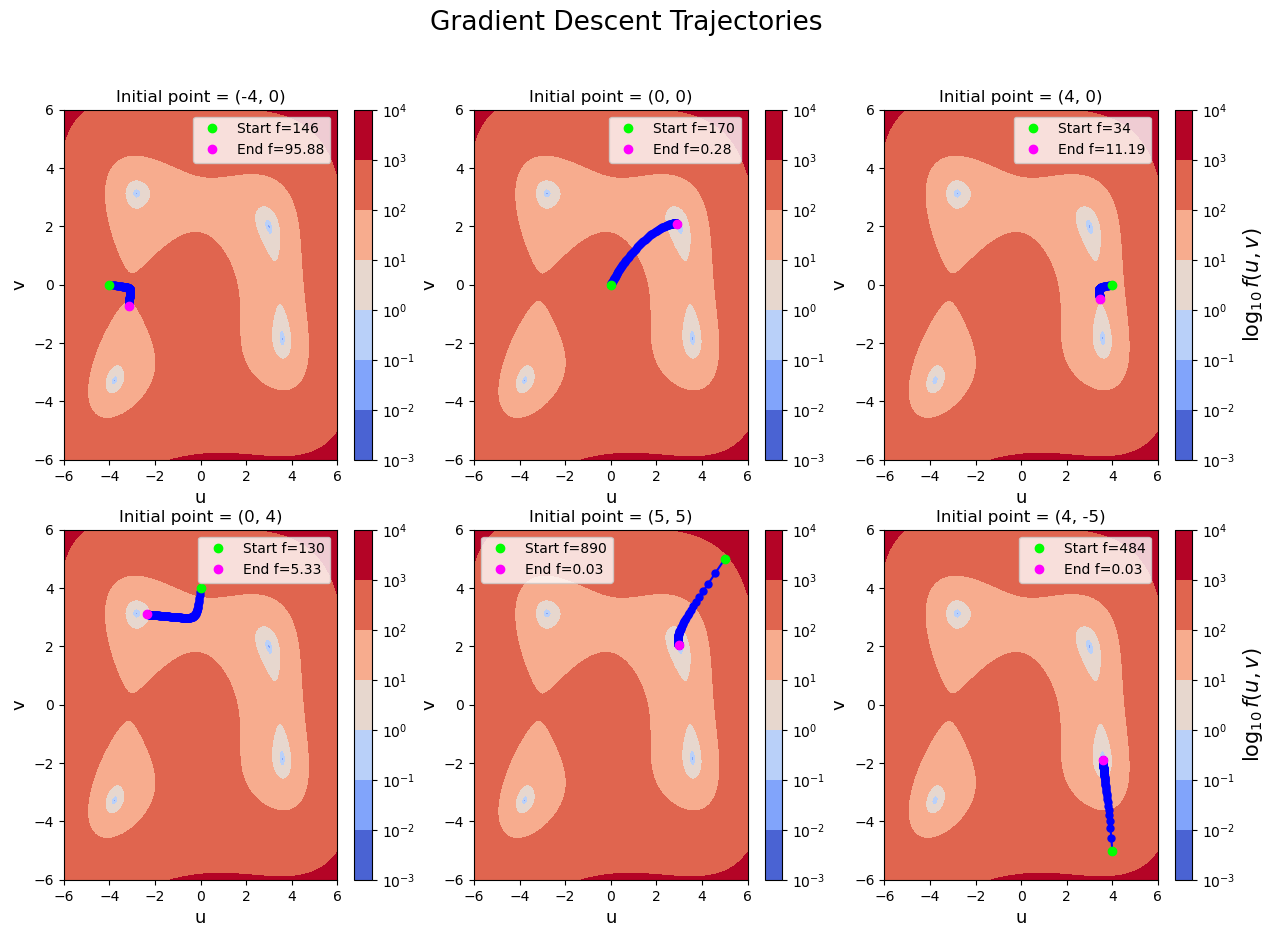

In [34]:
initial_points = [(-4,0), (0,0), (4,0), (0,4), (5,5), (4,-5)]

fig, ax = plt.subplots(2,3, figsize=(15,10))
ax = ax.flatten()

u = np.linspace(-6, 6, 500)
v = np.linspace(-6, 6, 500)
U, V = np.meshgrid(u, v)
Z = f((U, V))

for i, points in enumerate(initial_points):
    u_0, v_0 = points
    eta_constant_strategy_init, values = gradient_descent(f,f_gradient,eta_const,u_0,v_0)
    print(f'Initial point = ({u_0}, {v_0}).'
          f'Final point = ({eta_constant_strategy_init[0][-1]},{eta_constant_strategy_init[0][-1]}).'
          f'Final function value = {values[-1]}.')
    
    contour = ax[i].contourf(U, V, Z, levels=200, norm=mcolors.LogNorm(vmin=Z.min(), vmax=Z.max()), cmap='coolwarm')
    cbar = fig.colorbar(contour, ax=ax[i])
    if i == 2 or i == 5:
        cbar.set_label('$\\log_{10}{f(u,v)}$', fontsize=15)
    ax[i].plot(eta_constant_strategy_init[0], eta_constant_strategy_init[1], 'bo-', markersize=5) 
    ax[i].plot(eta_constant_strategy_init[0][0], eta_constant_strategy_init[1][0], 'o', color='lime', label=f"Start f={values[0]}")
    ax[i].plot(eta_constant_strategy_init[0][-1], eta_constant_strategy_init[1][-1], 'o', color='fuchsia', label=f"End f={round(values[-1],2)}")

    ax[i].set_xlabel('u', fontsize=13)
    ax[i].set_ylabel('v', fontsize=13)
    ax[i].set_title(f'Initial point = ({u_0}, {v_0})')
    ax[i].legend()
    
fig.suptitle("Gradient Descent Trajectories", fontsize=19);
